In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('home-challenge.xls')

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(800, 9)

In [5]:
dataset.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [6]:
dataset.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
age                   800 non-null int64
weight                800 non-null int64
bmi                   800 non-null float64
blood_pressure        800 non-null int64
insulin_test          800 non-null int64
liver_stress_test     800 non-null float64
cardio_stress_test    800 non-null int64
years_smoking         800 non-null int64
zeta_disease          800 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [8]:
dataset["zeta_disease"].describe()

count    800.000000
mean       0.348750
std        0.476873
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: zeta_disease, dtype: float64

##### Outliers detection

From describe function we can find "liver_stress_test", "insulin_test", "cardio_stress_test" there are outlier, so it should be treated

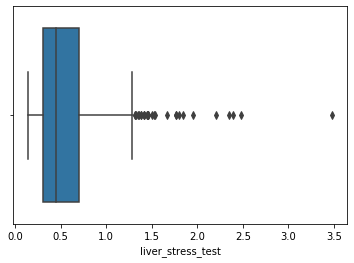

In [10]:
sns.boxplot(dataset["liver_stress_test"])

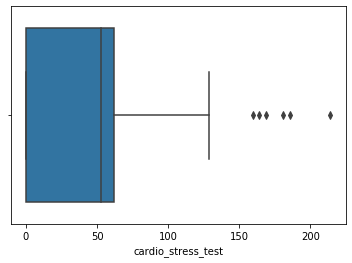

In [11]:
sns.boxplot(dataset["cardio_stress_test"])

After checking the boxplot, it is recommended to treat outliers and build the model for better output.

###### Outlier treating using z value

In [12]:
from scipy import stats
z = np.abs(stats.zscore(dataset))
print(z)

[[1.66589677 0.51977498 0.5971136  ... 1.41888518 1.42534108 0.73178456]
 [0.57797896 0.70193508 0.73718577 ... 0.39086488 0.4914866  0.73178456]
 [1.15921516 0.42579728 0.26939095 ... 1.41888518 0.7065307  0.73178456]
 ...
 [0.28844661 0.2007207  0.77267931 ... 1.41888518 0.22732378 0.73178456]
 [5.64696662 1.04651997 0.4800698  ... 0.32505579 0.73109006 0.73178456]
 [0.36082969 0.73905627 0.29279971 ... 1.41888518 0.73109006 0.73178456]]


In [13]:
threshold = 3
print(np.where(z > 3))

(array([  3,  25,  27,  34,  45,  56,  63,  65,  68,  74,  77,  80,  84,
        84,  98, 102, 106, 109, 110, 112, 117, 132, 146, 147, 149, 150,
       151, 194, 214, 214, 221, 227, 227, 228, 230, 236, 264, 270, 277,
       292, 302, 310, 310, 318, 338, 348, 354, 354, 357, 359, 370, 374,
       379, 392, 393, 409, 411, 426, 426, 428, 431, 438, 440, 442, 447,
       447, 448, 451, 452, 453, 456, 456, 462, 465, 467, 467, 481, 504,
       505, 508, 509, 509, 522, 529, 549, 551, 565, 565, 567, 583, 597,
       643, 651, 663, 679, 687, 687, 701, 703, 708, 711, 711, 743, 744,
       748, 753, 760, 761, 766, 778, 778, 782, 783, 792, 798], dtype=int64), array([4, 3, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3, 3, 3, 5, 7,
       2, 3, 6, 5, 0, 3, 1, 4, 4, 2, 3, 5, 3, 6, 2, 4, 4, 2, 7, 4, 5, 3,
       4, 3, 2, 3, 4, 7, 3, 0, 0, 3, 0, 3, 2, 4, 5, 4, 3, 6, 3, 6, 2, 3,
       5, 3, 6, 4, 2, 5, 7, 4, 2, 3, 4, 1, 5, 3, 2, 3, 2, 5, 3, 3, 4, 7,
       1, 4, 6, 4, 4, 3, 3, 2, 5, 3, 0, 3, 2, 3, 4, 5,

In [14]:
dataset_df = dataset[(z < 3).all(axis=1)]

Orginal data

In [15]:
dataset.shape

(800, 9)

Data without Outliers

In [17]:
dataset_df.shape

(699, 9)

In [18]:
dataset_df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,30.258941,170.605150,32.264807,72.369099,73.037196,0.518374,42.769671,3.909871,0.333333
std,11.605387,30.072335,6.661067,12.290466,91.024266,0.286709,27.701177,3.346581,0.471742
min,18.000000,94.000000,18.200000,24.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.400000,64.000000,0.000000,0.307300,0.000000,1.000000,0.000000
50%,26.000000,165.000000,32.200000,72.000000,44.000000,0.432800,53.000000,3.000000,0.000000
75%,38.000000,189.000000,36.400000,80.000000,126.000000,0.672300,62.000000,6.000000,1.000000
max,67.000000,249.000000,57.300000,122.000000,440.000000,1.538800,129.000000,15.000000,1.000000


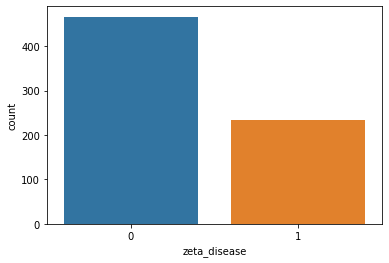

In [19]:
X = dataset_df[["age","weight","bmi","blood_pressure","insulin_test","liver_stress_test","cardio_stress_test","years_smoking"]]
y = dataset_df["zeta_disease"]

sns.countplot(y)

In [20]:
Output = dataset_df.zeta_disease.value_counts()
print(Output)

print("Percentage of patience without zeta_disease: "+str(round(Output[0]*100/699,2)))
print("Percentage of patience with zeta_disease: "+str(round(Output[1]*100/699,2)))

0    466
1    233
Name: zeta_disease, dtype: int64
Percentage of patience without zeta_disease: 66.67
Percentage of patience with zeta_disease: 33.33


#### Train Test Split

In [21]:
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state = 1)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 8), (140, 8), (559,), (140,))

###### As it is classification use case, it is recomended to build classification models and based on accuracy of different models, we can select one

### Logistic Model

In [40]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [41]:
log_model.fit(X_train,y_train)

C:\Users\adi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predictions_log = log_model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
score_logmodel = round(accuracy_score(predictions_log,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_logmodel)+" %")

The accuracy score achieved using Logistic Regression is: 82.14 %


### RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier      
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
predictions_rfc = rfc_model.predict(X_test)

In [51]:
score_rfcmodel = round(accuracy_score(predictions_rfc,y_test)*100,2)

print("The accuracy score achieved using RandomForest model is: "+str(score_rfcmodel)+" %")

The accuracy score achieved using RandomForest model is: 83.57 %


### XG Boost

In [53]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=3)

In [54]:
xgb_model.fit(X_train, y_train)

C:\Users\adi\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=3, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [55]:
predictions_xgb = xgb_model.predict(X_test)

In [56]:
score_xgbmodel = round(accuracy_score(predictions_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost model is: "+str(score_xgbmodel)+" %")

The accuracy score achieved using XGBoost model is: 77.14 %


#### Final_score

In [57]:
scores = [score_logmodel,score_rfcmodel,score_xgbmodel]
algorithms = ["Logistic Regression","Random Forest","XGBoost"] 

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 82.14 %
The accuracy score achieved using Random Forest is: 83.57 %
The accuracy score achieved using XGBoost is: 77.14 %


#### Finally, RandonForest model is recommended

We can still implement, neural networks using Tensorflow and also use H2o autoML feature as well to build model for above dataset